In [1]:
import os
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("../data/bollywood-movies.csv")


In [3]:
dataset

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000,88862500
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000,850000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000,31065000


In [4]:
x=dataset.iloc[:,:].values
x=pd.DataFrame(x)
y=dataset.copy()

In [5]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000,88862500
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000,850000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000,31065000


In [6]:
y

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Fight Club,Holiday,No,No,action,No,Yes,No,Zayed Khan,Vikram Chopra,Pritam,375,82500000,88862500
1694,Strings Of Paasion,Normal,No,No,drama,No,Yes,Yes,Zeenat Aman,Sanghamitra Chaudhuri,Dev Sikdar,10,8000000,70000
1695,Dunno Y Na Jaane Kyun,Normal,No,No,drama,No,No,No,Zeenat Aman,Sanjay Sharma,Nikhil,20,12500000,850000
1696,Taj Mahal - An Eternal Love Story,Normal,No,No,drama,No,Yes,No,Zulfi Sayed,Akbar Khan,Naushad,135,100000000,31065000


In [7]:
x[14]=np.where((x[12]<x[13]),1,0)
pd.DataFrame(x[14])

,14
0,0
1,0
2,0
3,0
4,1
...,...
1693,1
1694,0
1695,0
1696,0


In [8]:
y.columns=y.columns.str.lower()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie name          1698 non-null   object
 1   release period      1698 non-null   object
 2   whether remake      1698 non-null   object
 3   whether franchise   1698 non-null   object
 4   genre               1698 non-null   object
 5   new actor           1698 non-null   object
 6   new director        1698 non-null   object
 7   new music director  1698 non-null   object
 8   lead star           1698 non-null   object
 9   director            1698 non-null   object
 10  music director      1698 non-null   object
 11  number of screens   1698 non-null   int64 
 12  revenue(inr)        1698 non-null   int64 
 13  budget(inr)         1698 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 185.8+ KB


In [9]:
for i in dataset.columns:
    if dataset[i].dtype == "object":
        print(i)
        print(dataset[i].unique())
        print("\n")

Movie Name
['Golden Boys' 'Kaccha Limboo' 'Not A Love Story' ...
 'Dunno Y Na Jaane Kyun' 'Taj Mahal - An Eternal Love Story'
 'Mr. Hot Mr. Kool']


Release Period
['Normal' 'Holiday']


Whether Remake
['No' 'Yes']


Whether Franchise
['No' 'Yes']


Genre
['suspense' 'drama' 'thriller' 'adult' 'comedy' 'action' 'love_story'
 'rom__com' 'horror' 'fantasy' 'masala' 'mythological' 'animation'
 'documentary']


New Actor
['Yes' 'No']


New Director
['No' 'Yes']


New Music Director
['No' 'Yes']


Lead Star
['Jeet Goswami' 'Karan Bhanushali' 'Mahie Gill' 'Aadar Jain' 'Aadil Khan'
 'Aakar Kaushik' 'Aakash' 'Aamir Bashir' 'Aamir Khan' 'Aanamika Bawa'
 'Aarun Nagar' 'Aaryan' 'Aasad Mirza' 'Aashish Chanana'
 'Aashish Chaudhary' 'Aasif Albela' 'Aatri Kumar' 'Abhay Bakshi'
 'Abhay Deol' 'Abhijeet Sawant' 'Abhinav Shukla' 'Abhishek Anand'
 'Abhishek Bachchan' 'Abhishek Gupta' 'Abhishek Sharma' 'Abhishek Urade'
 'Adah Sharma' 'Adam Bedi' 'Adhvik Mahajan' 'Adhyayan Suman'
 'Adil Hussain' 'Aditi Inam

In [10]:
y["whether remake"]=np.where((y["whether remake"]=="Yes"),1,0)
y["whether franchise"]=np.where((y["whether franchise"]=="Yes"),1,0)
y["new actor"]=np.where((y["new actor"]=="Yes"),1,0)
y["new director"]=np.where((y["new director"]=="Yes"),1,0)
y["new music director"]=np.where((y["new music director"]=="Yes"),1,0)
y.drop(["revenue(inr)","budget(inr)","movie name","lead star","director","music director"],axis=1,inplace=True)
y.head()

,release period,whether remake,whether franchise,genre,new actor,new director,new music director,number of screens
0,Normal,0,0,suspense,1,0,0,5
1,Holiday,0,0,drama,1,0,1,75
2,Holiday,0,0,thriller,0,0,0,525
3,Holiday,0,0,drama,1,0,0,800
4,Holiday,0,0,adult,1,1,1,1


## Checking the range of number of screens

In [11]:
max(y['number of screens'])-min(y['number of screens'])

4599

In [12]:
y.describe()

,whether remake,whether franchise,new actor,new director,new music director,number of screens
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000
mean,0.041814,0.048292,0.267962,0.480565,0.326266,553.831567
std,0.200223,0.214446,0.443028,0.499769,0.468984,782.951839
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,800.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4600.000000


<AxesSubplot:>

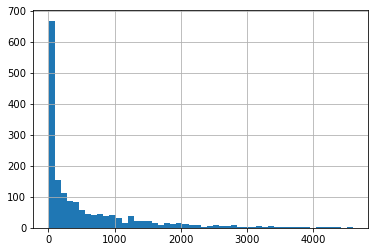

In [13]:
y["number of screens"].hist(bins=50)

Hihgly positively skewed distribution for number of screens,most having 1 screen

# Categorizing number of screens to high,moderate,and low.  
# Depending on quantiles


In [14]:
l=[]
for i in x[11]:
    if i>x[11].quantile(.75):
        l.append("High")
    elif i>x[11].quantile(.25) and i<x[11].quantile(.75):
        l.append("Moderate")
    else:
        l.append("Low")      

t=[]
for i in x[11]:
    if i>x[11].quantile(.75):
        t.append(3)
    elif i>x[11].quantile(.25) and i<x[11].quantile(.75):
        t.append(2)
    else:
        t.append(1)              

In [15]:
cg=pd.DataFrame(l)
dg=pd.DataFrame(t)
y1=y.copy()
z=y.copy()

y1["number of screens"]=dg[0]
y["number of screens"]=cg[0]



# OneHotEncoding done to categorical data:  

# OrdinalEncoding done to ordered data:

In [16]:
dummy=pd.get_dummies(y[["release period","genre","number of screens"]],drop_first=False)
y=pd.concat([y,dummy],axis=1).drop(["release period","genre","number of screens"],axis=1)
y

,whether remake,whether franchise,new actor,new director,new music director,release period_Holiday,release period_Normal,genre_action,genre_adult,genre_animation,...,genre_horror,genre_love_story,genre_masala,genre_mythological,genre_rom__com,genre_suspense,genre_thriller,number of screens_High,number of screens_Low,number of screens_Moderate
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1694,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1695,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1696,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
dummy=pd.get_dummies(y1[["release period","genre"]],drop_first=False)
y1=pd.concat([y1,dummy],axis=1).drop(["release period","genre"],axis=1)
y1

,whether remake,whether franchise,new actor,new director,new music director,number of screens,release period_Holiday,release period_Normal,genre_action,genre_adult,...,genre_documentary,genre_drama,genre_fantasy,genre_horror,genre_love_story,genre_masala,genre_mythological,genre_rom__com,genre_suspense,genre_thriller
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,2,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,0,0,0,1,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1694,0,0,0,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1695,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1696,0,0,0,1,0,2,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## Heat map of covariance - variance matrix

<AxesSubplot:>

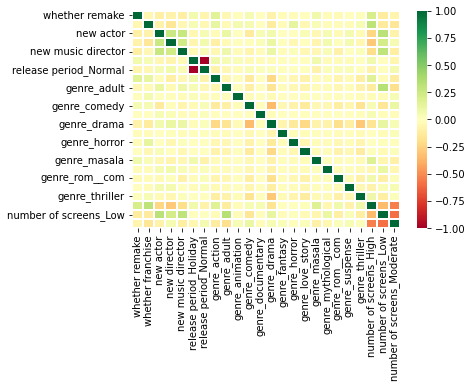

In [18]:
sns.heatmap(y.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = False)

# Splitting Data into Train and Test:

In [19]:
target=pd.DataFrame(x[14])

In [20]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(y,target,test_size=0.2,random_state=42)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(y1,target,test_size=0.2,random_state=42)
X3_train,X3_test,Y3_train,Y3_test=train_test_split(z,target,test_size=0.2,random_state=42)

# Building Decision Tree

In [21]:
model1=tree.DecisionTreeClassifier()
model1.fit(X1_train,Y1_train)
model1.score(X1_test,Y1_test)

0.8205882352941176

In [22]:
model2=tree.DecisionTreeClassifier()
model2.fit(X2_train,Y2_train)
model2.score(X2_test,Y2_test)

0.8117647058823529

[Text(0.6909987862292187, 0.9705882352941176, 'number of screens_High <= 0.5\ngini = 0.405\nsamples = 1358\nvalue = [975, 383]\nclass = Hit'),
 Text(0.4730901500662057, 0.9117647058823529, 'number of screens_Low <= 0.5\ngini = 0.263\nsamples = 1026\nvalue = [866, 160]\nclass = Hit'),
 Text(0.3440028689127556, 0.8529411764705882, 'new music director <= 0.5\ngini = 0.333\nsamples = 653\nvalue = [515, 138]\nclass = Hit'),
 Text(0.24148521406502868, 0.7941176470588235, 'new director <= 0.5\ngini = 0.372\nsamples = 469\nvalue = [353, 116]\nclass = Hit'),
 Text(0.1700750331028395, 0.7352941176470589, 'new actor <= 0.5\ngini = 0.423\nsamples = 260\nvalue = [181, 79]\nclass = Hit'),
 Text(0.1424157716639694, 0.6764705882352942, 'whether franchise <= 0.5\ngini = 0.44\nsamples = 233\nvalue = [157, 76]\nclass = Hit'),
 Text(0.11534500514933059, 0.6176470588235294, 'genre_drama <= 0.5\ngini = 0.43\nsamples = 227\nvalue = [156, 71]\nclass = Hit'),
 Text(0.08945122848315433, 0.5588235294117647, 'gen

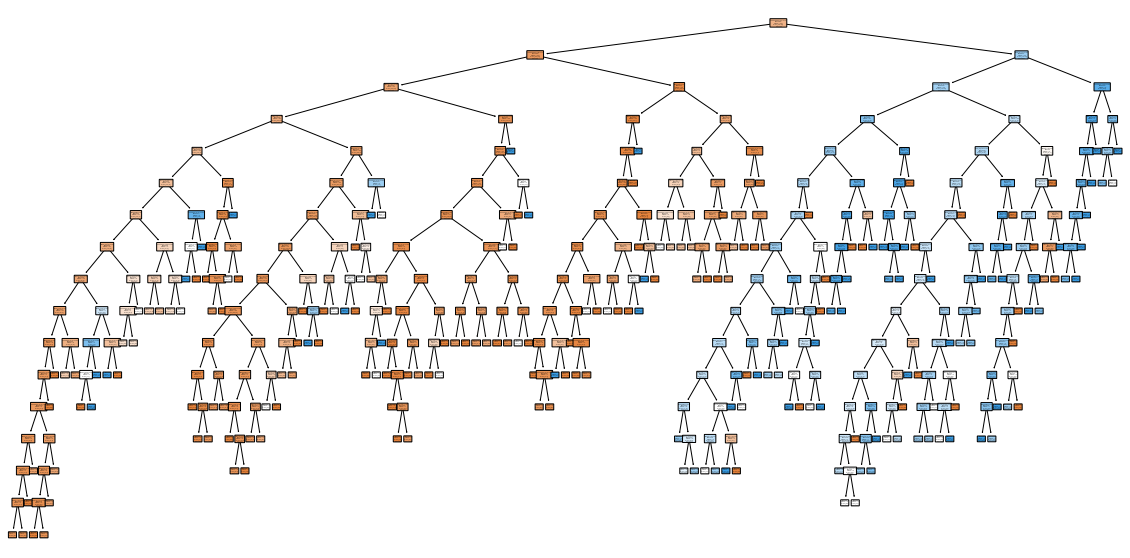

In [23]:
classes=["Hit", "Flop"]
plt.figure(figsize=(20, 10))
plot_tree(model1, filled=True, rounded=True,
          class_names=classes,
          feature_names=y.columns)

# Improving Accuracy


### Pre pruning

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Train score 0.8446244477172312
Test score 0.8205882352941176


Train Confusion matrix


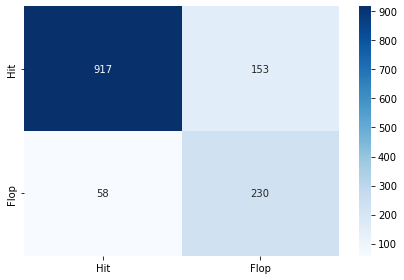

Test Confusion matrix


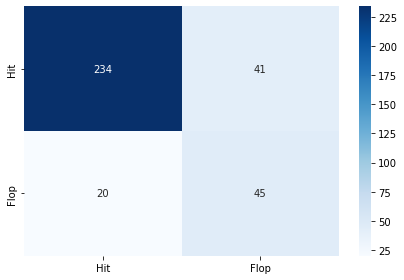

In [25]:
Y1_train_pred= model1.predict(X1_train)
Y1_test_pred = model1.predict(X1_test)
def plot_confusionmatrix(Y1_train_pred,Y1_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(Y1_train_pred,Y1_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Train score {accuracy_score(Y1_train_pred,Y1_train)}')
print(f'Test score {accuracy_score(Y1_test_pred,Y1_test)}')
print("\n")
plot_confusionmatrix(Y1_train_pred,Y1_train,dom='Train')
plot_confusionmatrix(Y1_test_pred,Y1_test,dom='Test')

## Cross-Validation for hyper-parameter selection


In [26]:
params = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X1_train,Y1_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8019145802650958
Test score 0.8352941176470589
Train Confusion matrix


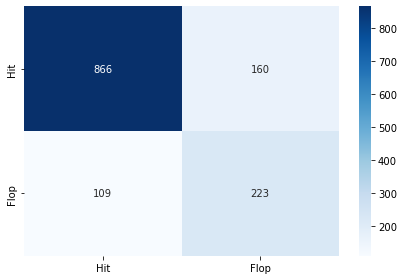

Test Confusion matrix


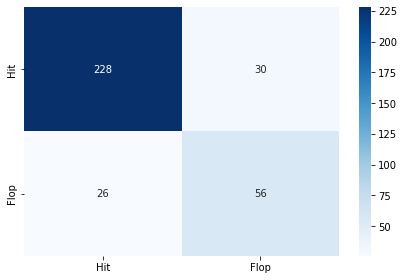

In [27]:
cv_model = gcv.best_estimator_
cv_model.fit(X1_train,Y1_train)
Y1_train_pred = cv_model.predict(X1_train)
Y1_test_pred = cv_model.predict(X1_test)

print(f'Train score {accuracy_score(Y1_train_pred,Y1_train)}')
print(f'Test score {accuracy_score(Y1_test_pred,Y1_test)}')
plot_confusionmatrix(Y1_train_pred,Y1_train,dom='Train')
plot_confusionmatrix(Y1_test_pred,Y1_test,dom='Test')

[Text(0.5, 0.8333333333333334, 'number of screens_High <= 0.5\ngini = 0.405\nsamples = 1358\nvalue = [975, 383]\nclass = Hit'),
 Text(0.25, 0.5, 'number of screens_Low <= 0.5\ngini = 0.263\nsamples = 1026\nvalue = [866, 160]\nclass = Hit'),
 Text(0.125, 0.16666666666666666, 'gini = 0.333\nsamples = 653\nvalue = [515, 138]\nclass = Hit'),
 Text(0.375, 0.16666666666666666, 'gini = 0.111\nsamples = 373\nvalue = [351, 22]\nclass = Hit'),
 Text(0.75, 0.5, 'genre_rom__com <= 0.5\ngini = 0.441\nsamples = 332\nvalue = [109, 223]\nclass = Flop'),
 Text(0.625, 0.16666666666666666, 'gini = 0.453\nsamples = 303\nvalue = [105, 198]\nclass = Flop'),
 Text(0.875, 0.16666666666666666, 'gini = 0.238\nsamples = 29\nvalue = [4, 25]\nclass = Flop')]

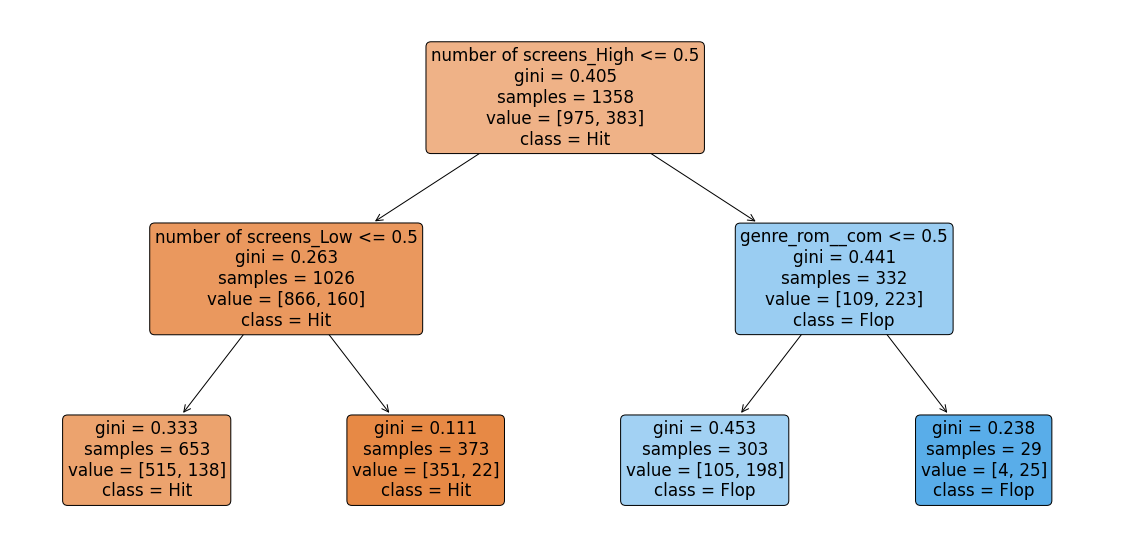

In [28]:
classes=["Flop","Hit"][::-1]
plt.figure(figsize=(20, 10))
plot_tree(cv_model, filled=True, rounded=True,
          class_names=classes,
          feature_names=y.columns)

## Post Pruning

Cost complexity Pruning

In [29]:
path = clf.cost_complexity_pruning_path(X1_train, Y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[ 0.00000000e+00 -8.67361738e-19  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.33770484e-06  5.84426210e-06  1.11384760e-05
  1.16270057e-05  1.33886732e-05  1.37213110e-05  1.40262290e-05
  1.75327863e-05  2.04549174e-05  2.10393436e-05  2.16581478e-05
  2.31020243e-05  2.45459008e-05  2.62991795e-05  2.91897199e-05
  3.15590154e-05  3.50655726e-05  3.50655726e-05  3.50655726e-05
  3.74032775e-05  3.85908815e-05  4.90918017e-05  4.90918017e-05
  5.44756068e-05  5.45464463e-05  6.13292606e-05  6.13647521e-05
  6.13647521e-05  6.16794431e-05  6.31180307e-05  6.37555866e-05
  6.54557356e-05  7.01311452e-05  7.25219797e-05  7.36377025e-05
  7.36377025e-05  7.60389319e-05  7.61040370e-05  8.28822626e-05
  8.41573743e-05  8.63152557e-05  8.92578212e-05  9.03992256e-05
  9.15601063e-05  9.67241173e-05  9.81836033e-05  1.05196718e-04
  1.10456554e-04  1.10456554e-04  1.13963111e-04  1.22729504e-04
  1.22729504e-04  1.22729504e-04  1.39465346e-04  1.40262290e-04
  1.40262290e-04  1.41092

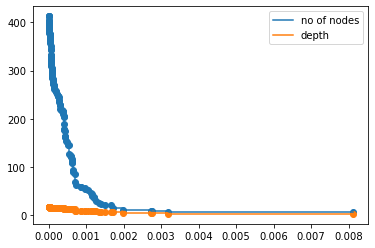

In [30]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=abs(ccp_alpha))
    clf.fit(X1_train, Y1_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

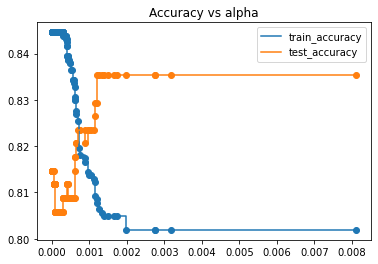

In [31]:
train_acc = []
test_acc = []
for c in clfs:
    Y1_train_pred = c.predict(X1_train)
    Y1_test_pred = c.predict(X1_test)
    train_acc.append(accuracy_score(Y1_train_pred,Y1_train))
    test_acc.append(accuracy_score(Y1_test_pred,Y1_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.8181148748159057
Test score 0.8235294117647058
Train Confusion matrix


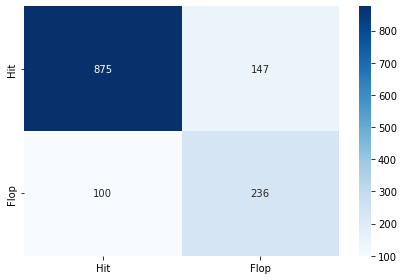

Test Confusion matrix


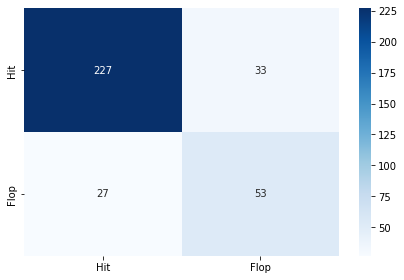

In [32]:
cos_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0008)
cos_.fit(X1_train,Y1_train)
Y1_train_pred = cos_.predict(X1_train)
Y1_test_pred = cos_.predict(X1_test)


print(f'Train score {accuracy_score(Y1_train_pred,Y1_train)}')
print(f'Test score {accuracy_score(Y1_test_pred,Y1_test)}')
plot_confusionmatrix(Y1_train_pred,Y1_train,dom='Train')
plot_confusionmatrix(Y1_test_pred,Y1_test,dom='Test')

[Text(0.5240384615384616, 0.95, 'number of screens_High <= 0.5\ngini = 0.405\nsamples = 1358\nvalue = [975, 383]\nclass = Hit'),
 Text(0.2532051282051282, 0.85, 'number of screens_Moderate <= 0.5\ngini = 0.263\nsamples = 1026\nvalue = [866, 160]\nclass = Hit'),
 Text(0.10256410256410256, 0.75, 'genre_adult <= 0.5\ngini = 0.111\nsamples = 373\nvalue = [351, 22]\nclass = Hit'),
 Text(0.05128205128205128, 0.65, 'whether remake <= 0.5\ngini = 0.056\nsamples = 315\nvalue = [306, 9]\nclass = Hit'),
 Text(0.02564102564102564, 0.55, 'gini = 0.05\nsamples = 314\nvalue = [306, 8]\nclass = Hit'),
 Text(0.07692307692307693, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Flop'),
 Text(0.15384615384615385, 0.65, 'new director <= 0.5\ngini = 0.348\nsamples = 58\nvalue = [45, 13]\nclass = Hit'),
 Text(0.1282051282051282, 0.55, 'gini = 0.431\nsamples = 35\nvalue = [24, 11]\nclass = Hit'),
 Text(0.1794871794871795, 0.55, 'gini = 0.159\nsamples = 23\nvalue = [21, 2]\nclass = Hit'),
 Text(0.40384

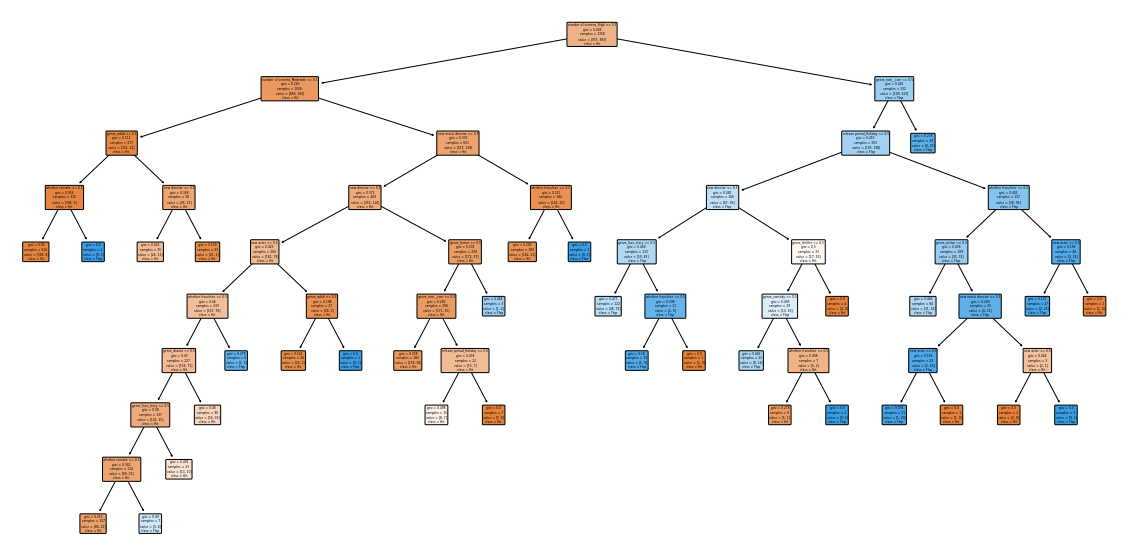

In [33]:
classes=["Hit", "Flop"]
plt.figure(figsize=(20, 10))
plot_tree(cos_, filled=True, rounded=True,
          class_names=classes,
          feature_names=y.columns)

# Naive Bayes Classifier

### Using Multinomial Naive Bayes since most of the categorical data has been pre processed to One_Hot_Encoding leading to binary values

In [34]:
import sklearn
from sklearn import metrics, preprocessing, model_selection, naive_bayes

## Used k=3 fold crossvalidation

In [35]:
skf = model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
nb_clf = naive_bayes.MultinomialNB()
metric = {
    'accuracy': [],
    'recall': [],
    'precision': []
}
for i, (train_idx, test_idx) in enumerate(skf.split(y, target)):
    X1_train = y.iloc[train_idx, :]
    X1_test = y.iloc[test_idx, :]

    Y1_train = target.iloc[train_idx, :]
    Y1_test = target.iloc[test_idx, :]

    nb_clf.fit(X1_train, Y1_train.values)
    Y1_pred = nb_clf.predict(X1_test.values)
    metric['accuracy'].append(metrics.accuracy_score(Y1_test, Y1_pred))
    metric['precision'].append(metrics.precision_score(Y1_test, Y1_pred))
    metric['recall'].append(metrics.recall_score(Y1_test, Y1_pred,average="weighted"))

for m in metric.keys():
    metric[m] = [100*np.mean(metric[m]), 100*np.std(metric[m])]

pd.DataFrame(metric, index=['mean', 'std'])





,accuracy,recall,precision
mean,80.329800,80.329800,66.865385
std,1.174908,1.174908,2.581434
